In [1]:
#This notebook demonstrates effect of Dimensionality reduction on the Efficiency of the in-built classifiers from scikit learn's library  with regards to
#(a) Various synthetic dataset
#(b) Varipous Dimensionality reduction algorithums

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import make_blobs
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

In [154]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt')]

classifiers1 = [
    make_pipeline(TruncatedSVD(n_components=2), KNeighborsClassifier(n_neighbors=3)),
    make_pipeline(TruncatedSVD(n_components=2), SVC(kernel="linear", C=0.025)),
    make_pipeline(TruncatedSVD(n_components=2), SVC(gamma=2, C=1)),
    make_pipeline(TruncatedSVD(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))]

classifiers_PCA = [
    make_pipeline(PCA(n_components=2), KNeighborsClassifier(n_neighbors=3)),
    make_pipeline(PCA(n_components=2), SVC(kernel="linear", C=0.025)),
    make_pipeline(PCA(n_components=2), SVC(gamma=2, C=1)),
    make_pipeline(PCA(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))]

classifiers_LDA = [
    make_pipeline(LinearDiscriminantAnalysis(n_components=2), KNeighborsClassifier(n_neighbors=3)),
    make_pipeline(LinearDiscriminantAnalysis(n_components=2), SVC(kernel="linear", C=0.025)),
    make_pipeline(LinearDiscriminantAnalysis(n_components=2), SVC(gamma=2, C=1)),
    make_pipeline(LinearDiscriminantAnalysis(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))]

In [52]:
datasets = [make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None),
           make_circles(n_samples=1000, shuffle=True, noise=0.1, random_state=None, factor=0.6),
            make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)]
df = []
for i in range (len(datasets)):
    df1 = pd.DataFrame(datasets[i][0],columns=['x'+str(i) for i in range(1,3)])
    df.append(df1)


In [69]:
df[0]['y'] = datasets[0][1]
df[1]['y'] = datasets[1][1]
df[2]['y'] = datasets[2][1]
df

[           x1        x2  y
 0    1.228947 -0.491363  1
 1   -0.842539  0.456730  0
 2   -0.074915  1.017925  0
 3    0.017287  0.105289  1
 4   -0.710071  0.802643  0
 5    0.748911 -0.619336  1
 6    0.956876  0.278608  0
 7   -0.735939  0.645593  0
 8   -0.224634  0.961226  0
 9    1.004971  0.378530  0
 10   0.215807  1.010092  0
 11  -0.400291  0.949559  0
 12   0.764596 -0.591292  1
 13   1.158740 -0.653556  1
 14   1.515494 -0.232896  1
 15   0.792152 -0.445511  1
 16  -0.836802  0.008734  0
 17  -0.052488  0.136572  1
 18   0.536302 -0.363710  1
 19   0.570246 -0.256164  1
 20  -0.900873  0.195871  0
 21   0.084284  0.134558  1
 22   1.434455 -0.253915  1
 23  -1.101538 -0.080749  0
 24   0.823358  0.390396  0
 25   1.847650 -0.245252  1
 26   1.160037 -0.381176  1
 27   0.591799  0.566405  0
 28   1.576986 -0.129881  1
 29   0.839950  0.723189  0
 ..        ...       ... ..
 970  0.836157  0.496968  0
 971 -0.020574  0.243776  1
 972 -0.059076  0.220449  1
 973 -0.919902  0.41

In [38]:
n_dim = 2
m_dim = [1, 500, 1000]
mu = []
sigma = []
gauss_noise = []
for k in range(3):
    mu.append(k*2)
    sigma.append(k*100)
    
for i in range(len(m_dim)):
    gauss_noise.append(np.random.normal(mu[i], sigma[i], size = [n_dim, m_dim[i]]))

In [114]:
df_noise = []
for j in range(len(m_dim)):
    df_noise.append(pd.DataFrame(gauss_noise[j], columns=['dim'+ str(i) for i in range(1,m_dim[j]+1)]))

df_noise

[     dim1
 0     0.0
 1     0.0
 2     0.0
 3     0.0
 4     0.0
 5     0.0
 6     0.0
 7     0.0
 8     0.0
 9     0.0
 10    0.0
 11    0.0
 12    0.0
 13    0.0
 14    0.0
 15    0.0
 16    0.0
 17    0.0
 18    0.0
 19    0.0
 20    0.0
 21    0.0
 22    0.0
 23    0.0
 24    0.0
 25    0.0
 26    0.0
 27    0.0
 28    0.0
 29    0.0
 ..    ...
 970   0.0
 971   0.0
 972   0.0
 973   0.0
 974   0.0
 975   0.0
 976   0.0
 977   0.0
 978   0.0
 979   0.0
 980   0.0
 981   0.0
 982   0.0
 983   0.0
 984   0.0
 985   0.0
 986   0.0
 987   0.0
 988   0.0
 989   0.0
 990   0.0
 991   0.0
 992   0.0
 993   0.0
 994   0.0
 995   0.0
 996   0.0
 997   0.0
 998   0.0
 999   0.0
 
 [1000 rows x 1 columns],
            dim1        dim2        dim3        dim4        dim5        dim6  \
 0    117.479160   61.881429 -110.721172   27.837735  127.026137   60.654868   
 1    107.399208 -168.436524  103.449681   73.484660   13.786538  -12.405546   
 2     27.774708   75.746156   46.829964  -24.2591

In [116]:
dataset_noise = []
for i in range(3):
    dataset_noise.append(pd.concat([df[i], df_noise[i]],axis = 1))          

In [155]:
score_a = []
score1_a = []
scorePCA_a = []
scoreLDA_a = []

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(dataset_noise):
    # preprocess dataset, split into training and test part
    X = ds.iloc[:, :-1].values
    Y =  dataset_noise[1]
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)


    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        score_a.append(score)
        
    for name, clf in zip(names, classifiers1):
        clf.fit(X_train, y_train)
        score1 = clf.score(X_test, y_test)
        score1_a.append(score1)
        
    for name, clf in zip(names, classifiers_PCA):
        clf.fit(X_train, y_train)
        scorePCA = clf.score(X_test, y_test)
        scorePCA_a.append(score1)
        
    for name, clf in zip(names, classifiers_LDA):
        clf.fit(X_train, y_train)
        scoreLDA = clf.score(X_test, y_test)
        scoreLDA_a.append(score1)


/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarnin

array([[ 1.26441196,  1.50948447,  0.4472136 , ..., -1.12366475,
        -0.3317781 , -0.15941455],
       [-1.64529983,  0.8298028 , -0.4472136 , ..., -0.68955895,
         0.99995886,  0.27403023],
       [ 0.94734338,  1.22119228,  0.4472136 , ..., -0.26410636,
         0.91041908,  0.42747411],
       ...,
       [ 0.93116951,  0.89664666,  0.4472136 , ...,  0.2253522 ,
        -0.17715351, -0.04873381],
       [-0.06748588, -1.13546529, -1.34164079, ..., -0.28410624,
        -0.0083902 ,  0.78874584],
       [-0.61165013, -0.94392564, -1.34164079, ...,  1.06950161,
         1.46721184,  0.08732821]])

In [157]:
Final_PCA = []
Final_LDA = []
Final = []
for i in range(12):
    F = (score1_a[i] - score_a[i])
    Final.append(F)
    
for i in range(12):
    F = (scorePCA_a[i] - score_a[i])
    Final_PCA.append(F)

for i in range(12):
    F = (scoreLDA_a[i] - score_a[i])
    Final_LDA.append(F)
    


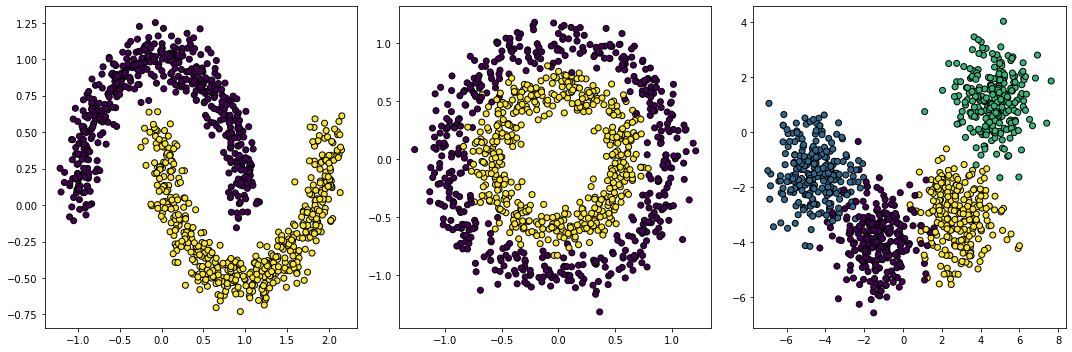

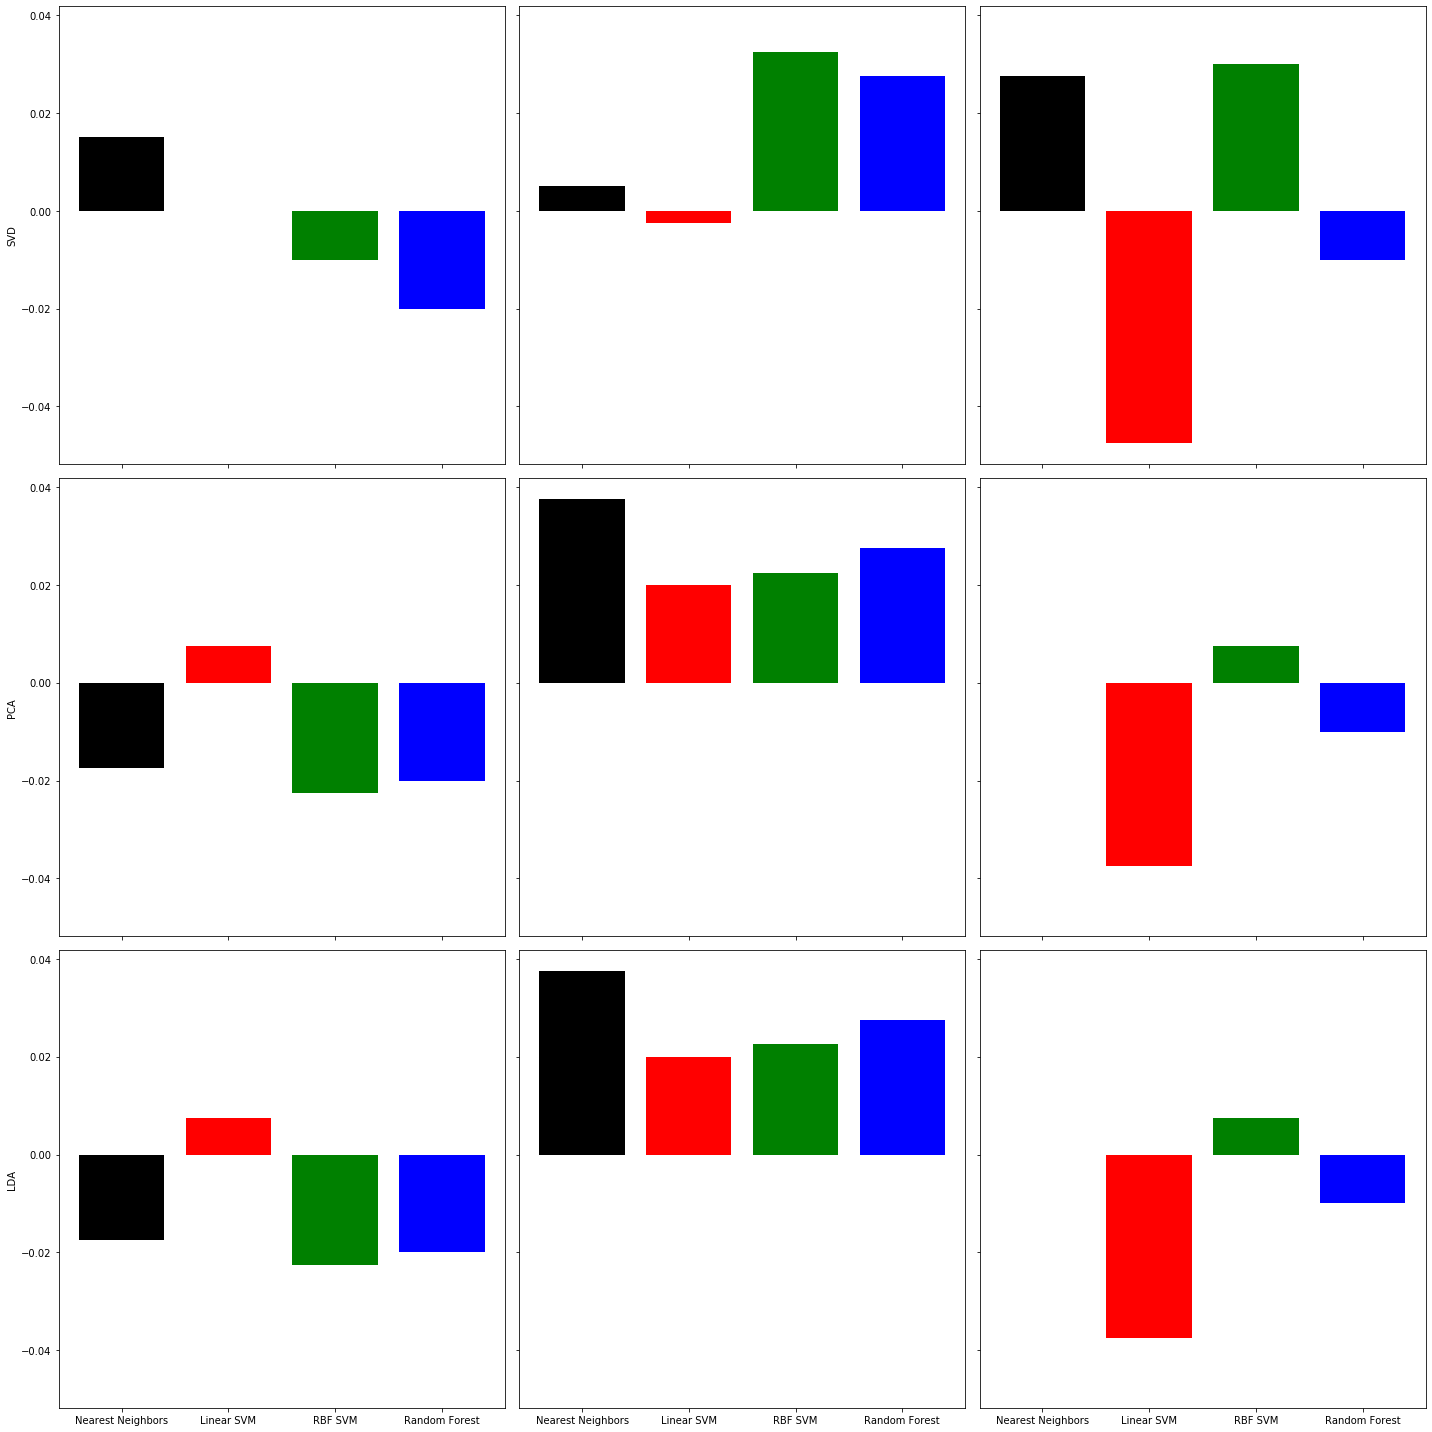

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


fig1, axs11 = plt.subplots(1, 3, figsize=((15,5)) )
(ax1, ax2, ax3) = axs11
ax1.scatter(df[0]['x1'], df[0]['x2'], c=df[0]['y'], edgecolors='k')
ax2.scatter(df[1]['x1'], df[1]['x2'], c=df[1]['y'], edgecolors='k')
ax3.scatter(df[2]['x1'], df[2]['x2'], c=df[2]['y'], edgecolors='k')

plt.tight_layout()
plt.show()

fig2, axs12 = plt.subplots(3, 3, figsize=((20,20)) ,squeeze=True, sharex=True, sharey=True )
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = axs12
fig.suptitle('Final')
ax1.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final[0],Final[1],Final[2],Final[3]], color=['black', 'red', 'green', 'blue'])
ax1.set_ylabel('SVD')
ax2.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final[4],Final[5],Final[6],Final[7]], color=['black', 'red', 'green', 'blue'] )
ax3.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final[8],Final[9],Final[10],Final[11]], color=['black', 'red', 'green', 'blue'])
ax4.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCA[0],Final_PCA[1],Final_PCA[2],Final_PCA[3]], color=['black', 'red', 'green', 'blue'])
ax4.set_ylabel('PCA')
ax5.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCA[4],Final_PCA[5],Final_PCA[6],Final_PCA[7]], color=['black', 'red', 'green', 'blue'])
ax6.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCA[8],Final_PCA[9],Final_PCA[10],Final_PCA[11]], color=['black', 'red', 'green', 'blue'])
ax7.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_LDA[0],Final_LDA[1],Final_LDA[2],Final_LDA[3]], color=['black', 'red', 'green', 'blue'])
ax7.set_ylabel('LDA')
ax8.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_LDA[4],Final_LDA[5],Final_LDA[6],Final_LDA[7]], color=['black', 'red', 'green', 'blue'])
ax9.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_LDA[8],Final_LDA[9],Final_LDA[10],Final_LDA[11]], color=['black', 'red', 'green', 'blue'])

# red_patch = mpatches.Patch(color=['red', 'green', 'blue', 'black'], label=["Linear SVM", "RBF SVM","Random Forest","Nearest Neighbors"])
# ax1.legend(handles=[red_patch],loc=2)
plt.tight_layout()
plt.show()